# Trading Signals - EWMA

In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from IPython.display import Markdown
%matplotlib inline

pd.set_option("display.max_rows", 2000)
pd.set_option("display.max_columns", 2000)
pd.set_option("display.width", 1000)

In [2]:
# Specify the stock ticker 
ticker = 'TSLA'

In [3]:
# Set the file path
filepath = Path("Resources/stock_data.csv")

# Read the CSV located at the file path into a Pandas DataFrame
stock_df = pd.read_csv(filepath, parse_dates=True, infer_datetime_format=True)

stock_df = stock_df.sort_index()
stock_df.drop('Unnamed: 0', inplace=True, axis=1)

stock_df.tail()

,date,open,high,low,close,volume
48,2021-03-15,694.09,713.18,684.0400,707.94,28269001
49,2021-03-16,703.35,707.92,671.0000,676.63,31258483
50,2021-03-17,656.87,703.73,651.0100,701.54,37888931
51,2021-03-18,684.29,689.23,652.0000,653.30,31802623
52,2021-03-19,646.60,657.23,624.6201,654.97,37974884


In [4]:
# Calculate daily return and add it to the dataframe column

stock_df['daily_return'] = stock_df['close'].dropna().pct_change()

In [5]:
stock_df.head()

,date,open,high,low,close,volume,daily_return
0,2021-01-04,719.46,744.4899,717.1895,729.750,45293360,NaN
1,2021-01-05,723.66,740.8400,719.2000,735.055,28402584,0.007270
2,2021-01-06,758.49,774.0000,749.1000,756.460,41989335,0.029120
3,2021-01-07,777.63,816.9900,775.2000,816.240,48080256,0.079026
4,2021-01-08,856.00,884.4900,838.3900,880.030,71814487,0.078151


In [6]:
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
stock_df['fast_close'] = stock_df['close'].ewm(halflife=short_window).mean()
stock_df['slow_close'] = stock_df['close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
stock_df['crossover_long'] = np.where(stock_df['fast_close'] > stock_df['slow_close'], 1.0, 0.0)
stock_df['crossover_short'] = np.where(stock_df['fast_close'] < stock_df['slow_close'], -1.0, 0.0)
stock_df['crossover_signal'] = stock_df['crossover_long'] + stock_df['crossover_short']

stock_df.head()

,date,open,high,low,close,volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
0,2021-01-04,719.46,744.4899,717.1895,729.750,45293360,NaN,729.750000,729.750000,0.0,0.0,0.0
1,2021-01-05,723.66,740.8400,719.2000,735.055,28402584,0.007270,733.286667,732.494392,1.0,0.0,1.0
2,2021-01-06,758.49,774.0000,749.1000,756.460,41989335,0.029120,746.528571,741.042597,1.0,0.0,1.0
3,2021-01-07,777.63,816.9900,775.2000,816.240,48080256,0.079026,783.708000,761.839283,1.0,0.0,1.0
4,2021-01-08,856.00,884.4900,838.3900,880.030,71814487,0.078151,833.422581,788.862369,1.0,0.0,1.0


<AxesSubplot:>

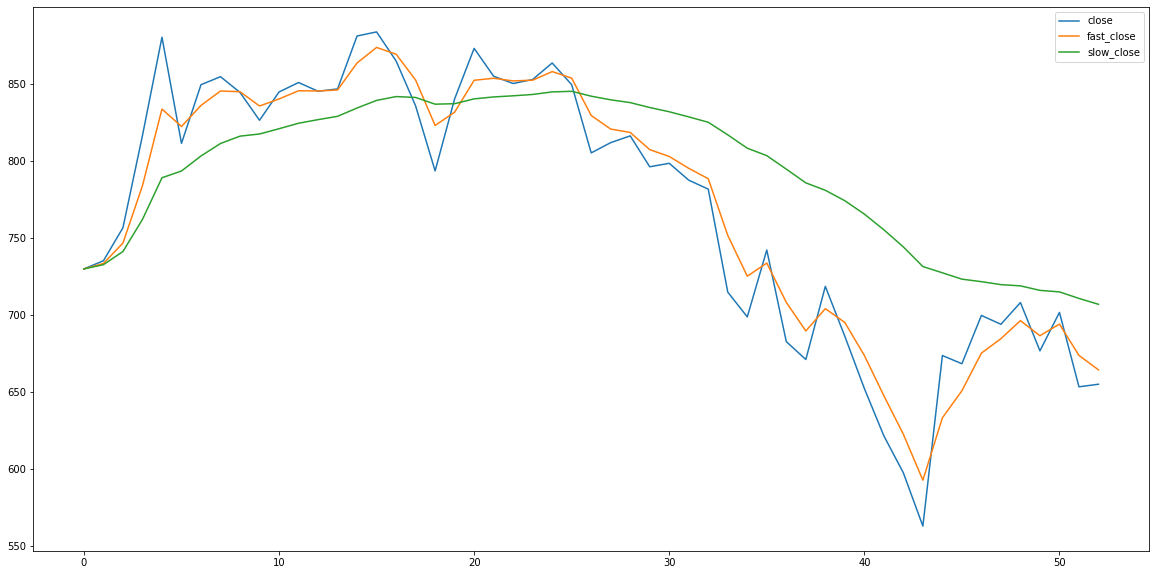

In [7]:
# Plot the EWMA of the stock closing prices
stock_df[['close', 'fast_close', 'slow_close']].plot(figsize=(20,10))

In [8]:
# Set short and long volatility windows
short_vol_window = 1
long_vol_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
stock_df['fast_vol'] = stock_df['daily_return'].ewm(halflife=short_vol_window).std()
stock_df['slow_vol'] = stock_df['daily_return'].ewm(halflife=long_vol_window).std()

# Construct a crossover trading signal
stock_df['vol_trend_long'] = np.where(stock_df['fast_vol'] < stock_df['slow_vol'], 1.0, 0.0)
stock_df['vol_trend_short'] = np.where(stock_df['fast_vol'] > stock_df['slow_vol'], -1.0, 0.0) 
stock_df['vol_trend_signal'] = stock_df['vol_trend_long'] + stock_df['vol_trend_short']

stock_df.head()

,date,open,high,low,close,volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal
0,2021-01-04,719.46,744.4899,717.1895,729.750,45293360,NaN,729.750000,729.750000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
1,2021-01-05,723.66,740.8400,719.2000,735.055,28402584,0.007270,733.286667,732.494392,1.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0
2,2021-01-06,758.49,774.0000,749.1000,756.460,41989335,0.029120,746.528571,741.042597,1.0,0.0,1.0,0.015451,0.015451,0.0,-1.0,-1.0
3,2021-01-07,777.63,816.9900,775.2000,816.240,48080256,0.079026,783.708000,761.839283,1.0,0.0,1.0,0.038487,0.037082,0.0,-1.0,-1.0
4,2021-01-08,856.00,884.4900,838.3900,880.030,71814487,0.078151,833.422581,788.862369,1.0,0.0,1.0,0.029296,0.035650,1.0,0.0,1.0


<AxesSubplot:>

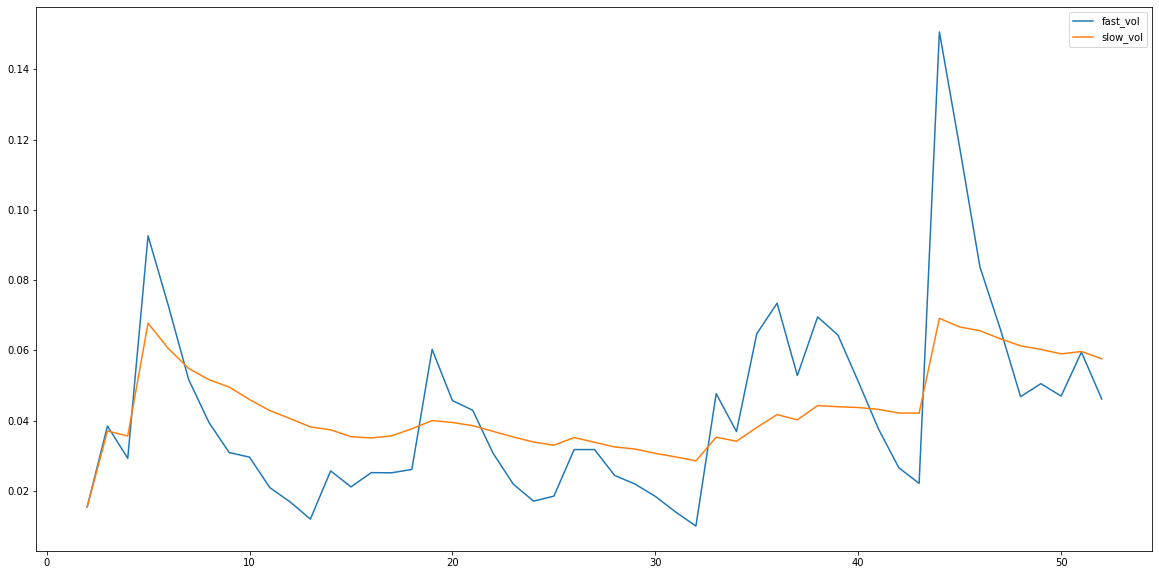

In [9]:
# Plot the EWMA of the stock daily return volatility
stock_df[['fast_vol', 'slow_vol']].plot(figsize=(20,10))

In [10]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
stock_df['bollinger_mid_band'] = stock_df['close'].rolling(window=bollinger_window).mean()
stock_df['bollinger_std'] = stock_df['close'].rolling(window=bollinger_window).std()

# Calculate upper and lowers bands of bollinger band
stock_df['bollinger_upper_band']  = stock_df['bollinger_mid_band'] + (stock_df['bollinger_std'] * 1)
stock_df['bollinger_lower_band']  = stock_df['bollinger_mid_band'] - (stock_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
stock_df['bollinger_long'] = np.where(stock_df['close'] < stock_df['bollinger_lower_band'], 1.0, 0.0)
stock_df['bollinger_short'] = np.where(stock_df['close'] > stock_df['bollinger_upper_band'], -1.0, 0.0)
stock_df['bollinger_signal'] = stock_df['bollinger_long'] + stock_df['bollinger_short']

stock_df.head()

,date,open,high,low,close,volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
0,2021-01-04,719.46,744.4899,717.1895,729.750,45293360,NaN,729.750000,729.750000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,2021-01-05,723.66,740.8400,719.2000,735.055,28402584,0.007270,733.286667,732.494392,1.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,2021-01-06,758.49,774.0000,749.1000,756.460,41989335,0.029120,746.528571,741.042597,1.0,0.0,1.0,0.015451,0.015451,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,2021-01-07,777.63,816.9900,775.2000,816.240,48080256,0.079026,783.708000,761.839283,1.0,0.0,1.0,0.038487,0.037082,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,2021-01-08,856.00,884.4900,838.3900,880.030,71814487,0.078151,833.422581,788.862369,1.0,0.0,1.0,0.029296,0.035650,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


<AxesSubplot:>

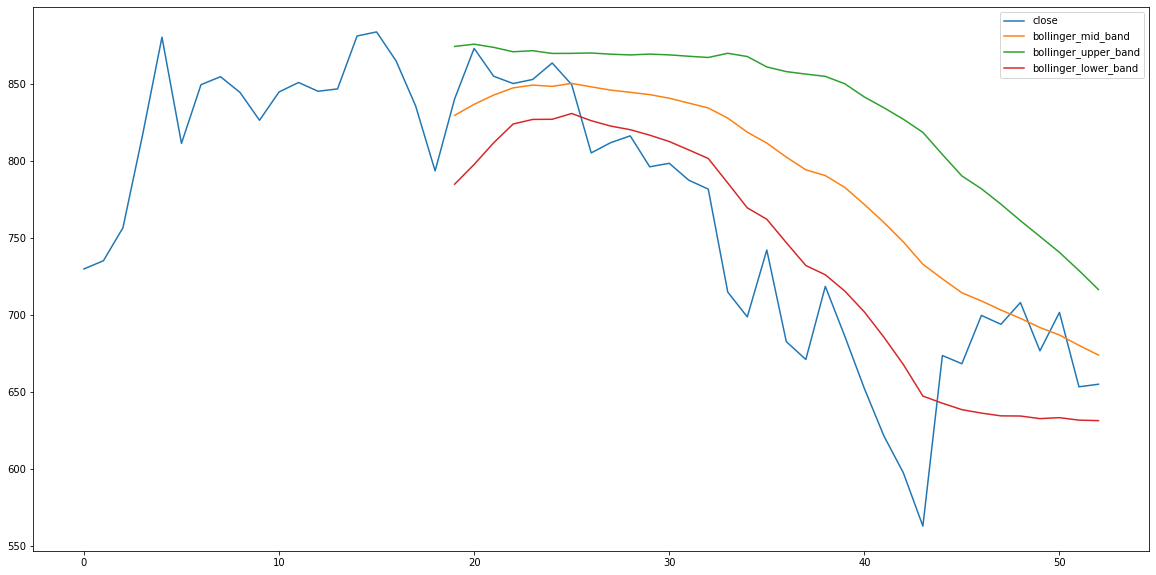

In [11]:
# Plot the Bollinger Bands for the stock closing prices
stock_df[['close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))

In [12]:
# Create .csv file with features to feed into random forrest model

stock_df.to_csv("Resources/trading_ewma_signals.csv")